# Question 11

Text(0.5, 1.0, 'diffraction profile')

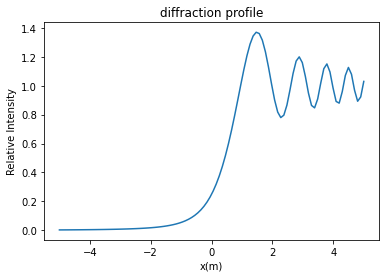

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from numpy import ones,copy,cos,tan,pi,linspace

def f1(x):
    return math.cos((math.pi*(x**2)/(2)))
            
def f2(x):
    return math.sin((math.pi*(x**2))/(2))

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

                    
N=50
def C(u,N):
    x,w=gaussxwab(N,0,u)
    val=0
    for i in range(N):
        val+=(w[i])*(f1(x[i]))
    return val
                    
def S(u,N):
    x,w=gaussxwab(N,0,u)
    val=0
    for i in range(N):
        val+=(w[i])*(f2(x[i]))
    return val
                    
                    
wave_length=1
z=3
x=np.linspace(-5,5,100)
u=[]
for i in range(0,100):
    u.append(x[i]*math.sqrt(2/(wave_length*z)))
                    
def rel_I(u,N):
    I=[]    
    for i in range(len(u)):
        I.append((1/8)*((2*C(u[i],N)+1)**2+(2*S(u[i],N)+1)**2))
    return I

plt.plot(x,rel_I(u,N))
        
plt.xlabel('x(m)')
plt.ylabel('Relative Intensity')
plt.title('diffraction profile')
                    

                    

In the negative x, the sound intensity drops to almost 0, in a near exponential fashion, which is expeced because this area is directly blocked by the obstacle. The second area has an interesting oscillating feature which dampens off. This is quite intuitive because for large positive x, the intensity will be 1, bsically being the case that obstacle is too far away to have any significant effect on the relative intensity.